####Installing Tesseract OCR Engine

In [ ]:
!sudo apt install tesseract-ocr

In [ ]:
!pip install pytesseract

####Importing Tesseract Library

In [3]:
import pytesseract
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

####  <font style="color:black">Import Python Libraries</font>

In [4]:
# Imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

##Phase 1 : Image Registration

#### Step 1.1 : Read & Display Tempalate and Scanned Image

Reading reference image: /content/reference_form.jpeg
Reading image to align: /content/test21.jpg


Text(0.5, 1.0, 'Scanned Form')

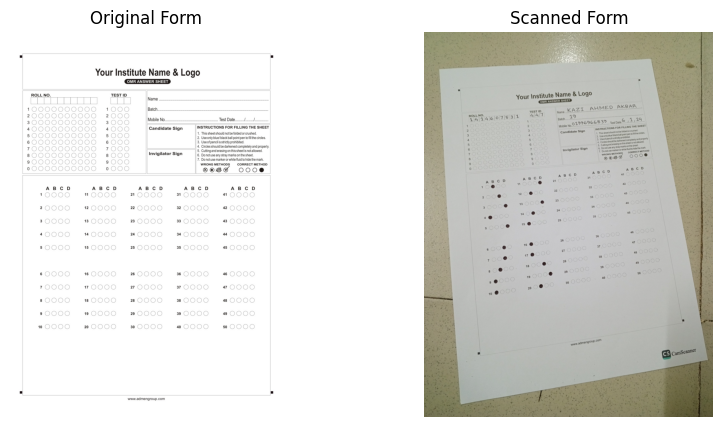

In [237]:
# Read reference image
ref_image_path = "/content/reference_form.jpeg"
print("Reading reference image:", ref_image_path)
im1 = cv2.imread(ref_image_path)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# Read image to be aligned
#input_imagee_path = "/content/input_image_1.jpg"
#input_imagee_path = "/content/input_image_2.jpg"
input_imagee_path = "/content/input_image_3.jpg"
print("Reading image to align:", input_imagee_path)
im2 = cv2.imread(input_imagee_path)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

# Display Images
plt.figure(figsize=[10, 5]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned Form")

#### Step 1.2 : Find keypoints in both Images

Think of keypoints as corner points that are stable under image transformations

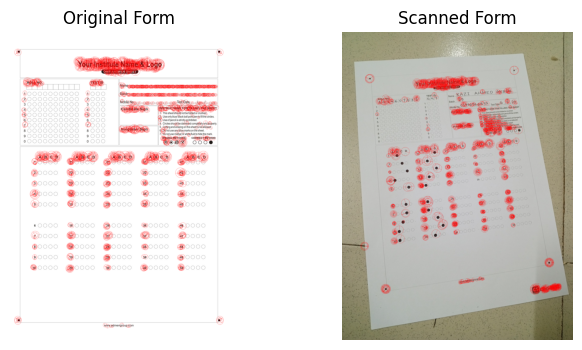

In [238]:
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

# Detect ORB features and compute descriptors.
MAX_NUM_FEATURES = 2000
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

# Display
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]),
                                color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]),
                                color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display Step 2 result
plt.figure(figsize=[8, 4])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

#### Step 1.3 : Match keypoints in the two image

Text(0.5, 1.0, 'Matching keypoints between reference image and input image')

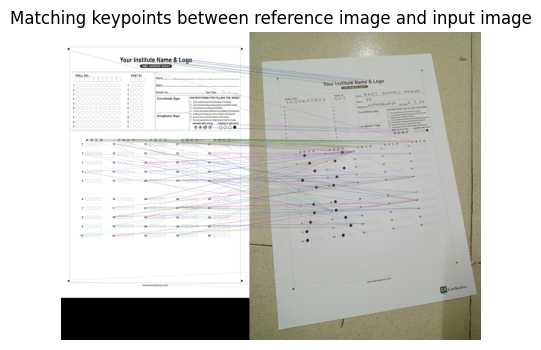

In [239]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Converting to list for sorting as tuples are immutable objects.
matches = list(matcher.match(descriptors1, descriptors2, None))

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

# Draw top matches
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

# Display Step 3 result
plt.figure(figsize=[8, 4])
plt.imshow(im_matches);plt.axis("off");plt.title("Matching keypoints between reference image and input image")

#### Step 1.4 :  Find Homography



In [240]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

#### Step 1.5 : Warp image & Registration completed

Text(0.5, 1.0, 'Scanned Form')

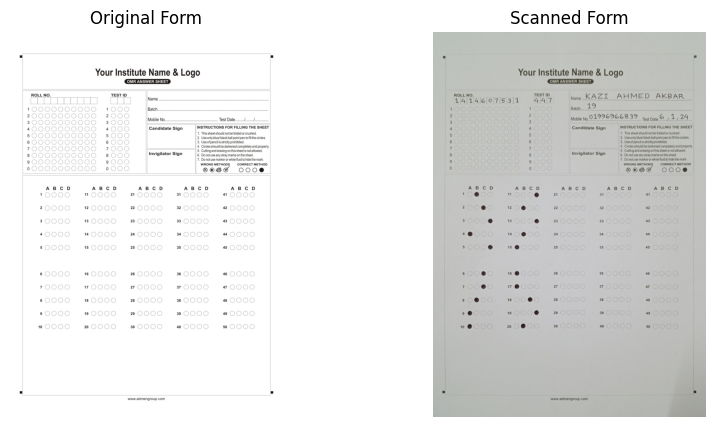

In [241]:
# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))
reg_image_path = "/content/registered_form.jpg"
cv2.imwrite(reg_image_path, im2_reg)

# Display results
plt.figure(figsize=[10, 5])
plt.subplot(121);plt.imshow(im1);    plt.axis("off");plt.title("Original Form")
plt.subplot(122);plt.imshow(im2_reg);plt.axis("off");plt.title("Scanned Form")

##Phase 2 : Extracting Information with OCR

####Step 2.1 : Selecting Different ROIs

Text(0.5, 1.0, 'Test ID')

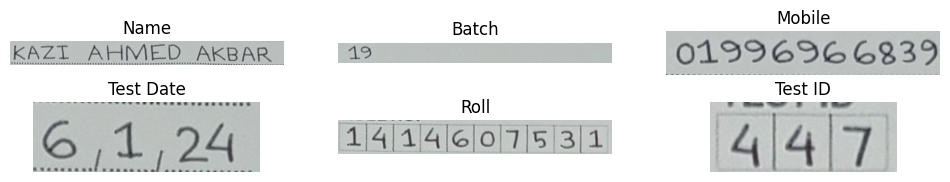

In [204]:
import matplotlib.image as mpimg

def define_and_save_roi(image_path, x, y, width, height, output_path):
    # Read the image
    img = cv2.imread(image_path)

    # Extract the region of interest (ROI) based on the specified coordinates and dimensions
    roi = img[y:y+height, x:x+width]

    # Save the defined area to the specified output directory
    cv2.imwrite(output_path, roi)

# Provide the path to your image file, the coordinates of the upper-left corner pixel,
# width, height, and the output directory
image_path = "/content/registered_form.jpg"

# Name field
name_path = "/content/name.jpg"
define_and_save_roi(image_path, 1350, 540, 995, 85, name_path)
name_roi = mpimg.imread(name_path)

# Batch field
batch_path = "/content/batch.jpg"
define_and_save_roi(image_path, 1344, 630, 1006, 77, batch_path)
batch_roi = mpimg.imread(batch_path)

# Mobile field
mobile_path = "/content/mobile.jpg"
define_and_save_roi(image_path, 1410, 730, 475, 75, mobile_path)
mobile_roi = mpimg.imread(mobile_path)

# Test Date field
test_date_path = "/content/test_date.jpg"
define_and_save_roi(image_path, 2048, 715, 308, 95, test_date_path)
test_date_roi = mpimg.imread(test_date_path)

# Roll field
roll_path = "/content/roll.jpg"
define_and_save_roi(image_path, 180, 580, 620, 75, roll_path)
roll_roi = mpimg.imread(roll_path)

# Test ID field
test_id_path = "/content/test_id.jpg"
define_and_save_roi(image_path, 906, 580, 200, 75, test_id_path)
test_id_roi = mpimg.imread(test_id_path)

# Display different roi
plt.figure(figsize=[12,2])
plt.subplot(231);plt.imshow(name_roi);    plt.axis("off");plt.title("Name")
plt.subplot(232);plt.imshow(batch_roi);plt.axis("off");plt.title("Batch")
plt.subplot(233);plt.imshow(mobile_roi);    plt.axis("off");plt.title("Mobile")
plt.subplot(234);plt.imshow(test_date_roi);    plt.axis("off");plt.title("Test Date")
plt.subplot(235);plt.imshow(roll_roi);    plt.axis("off");plt.title("Roll")
plt.subplot(236);plt.imshow(test_id_roi);    plt.axis("off");plt.title("Test ID")

####Step 2.2 : Necessary functions

In [205]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def binary(image):
    thresh, image_bw = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return(image_bw)

def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

def digit_recognition(img):
    import string

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours from left to right
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

    recognized_text = ""
    allowed_characters = string.digits

    for contour in contours:
            # Get bounding box coordinates and dimensions
            x, y, w, h = cv2.boundingRect(contour)
            min_contour_width = 0
            min_contour_height = 40

            # Check if the contour meets the minimum width and height criteria
            if w >= min_contour_width and h >= min_contour_height:
                # Extract the digit using the bounding box
                digit_roi = img[y:y+h, x:x+w]

                # Perform OCR using pytesseract
                digit_text = pytesseract.image_to_string(digit_roi, config='--psm 10 --oem 3')

                # Clean up OCR result (keep only digits)
                digit_text = ''.join(filter(lambda char: char in allowed_characters, digit_text))

                # Append recognized digit to the result
                recognized_text += digit_text.strip()

    return recognized_text

def text_recognition(img):
    import string

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours from left to right
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

    recognized_text = ""
    allowed_characters = string.ascii_letters + "- ()"

    for contour in contours:
            # Get bounding box coordinates and dimensions
            x, y, w, h = cv2.boundingRect(contour)
            min_contour_width = 0
            min_contour_height = 40

            # Check if the contour meets the minimum width and height criteria
            if w >= min_contour_width and h >= min_contour_height:
                # Extract the digit using the bounding box
                digit_roi = img[y:y+h, x:x+w]

                # Perform OCR using pytesseract
                digit_text = pytesseract.image_to_string(digit_roi, config='--psm 10 --oem 3')

                # Clean up OCR result (keep only digits)
                digit_text = ''.join(filter(lambda char: char in allowed_characters, digit_text))

                # Append recognized digit to the result
                recognized_text += digit_text.strip()

    return recognized_text

####Step 2.3 : Image Preprocessing for OCR (Grayscale)

Text(0.5, 1.0, 'Test ID')

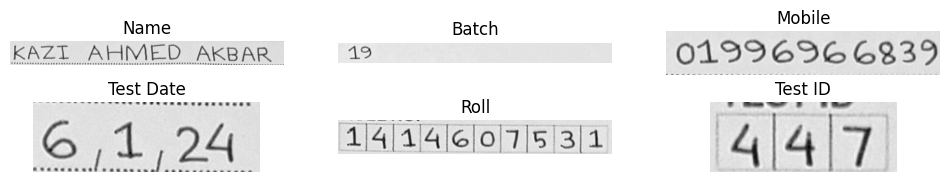

In [206]:
name_gray = grayscale(name_roi)
batch_gray = grayscale(batch_roi)
mobile_gray = grayscale(mobile_roi)
test_date_gray = grayscale(test_date_roi)
roll_gray = grayscale(roll_roi)
test_id_gray = grayscale(test_id_roi)

# Display different roi
plt.figure(figsize=[12,2])
plt.subplot(231);plt.imshow(name_gray, cmap = 'gray');    plt.axis("off");plt.title("Name")
plt.subplot(232);plt.imshow(batch_gray, cmap = 'gray');plt.axis("off");plt.title("Batch")
plt.subplot(233);plt.imshow(mobile_gray, cmap = 'gray');    plt.axis("off");plt.title("Mobile")
plt.subplot(234);plt.imshow(test_date_gray, cmap = 'gray');    plt.axis("off");plt.title("Test Date")
plt.subplot(235);plt.imshow(roll_gray, cmap = 'gray');    plt.axis("off");plt.title("Roll")
plt.subplot(236);plt.imshow(test_id_gray, cmap = 'gray');    plt.axis("off");plt.title("Test ID")

####Step 2.4 : Image Preprocessing for OCR (Threshold)

Text(0.5, 1.0, 'Test ID')

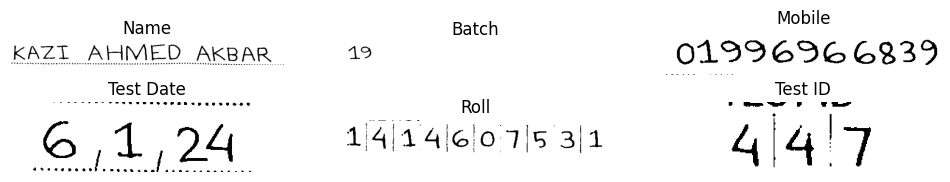

In [207]:
name_bw = binary(name_gray)
batch_bw = binary(batch_gray)
mobile_bw = binary(mobile_gray)
test_date_bw = binary(test_date_gray)
roll_bw = binary(roll_gray)
test_id_bw = binary(test_id_gray)

# Display different roi
plt.figure(figsize=[12,2])
plt.subplot(231);plt.imshow(name_bw, cmap = 'gray');    plt.axis("off");plt.title("Name")
plt.subplot(232);plt.imshow(batch_bw, cmap = 'gray');plt.axis("off");plt.title("Batch")
plt.subplot(233);plt.imshow(mobile_bw, cmap = 'gray');    plt.axis("off");plt.title("Mobile")
plt.subplot(234);plt.imshow(test_date_bw, cmap = 'gray');    plt.axis("off");plt.title("Test Date")
plt.subplot(235);plt.imshow(roll_bw, cmap = 'gray');    plt.axis("off");plt.title("Roll")
plt.subplot(236);plt.imshow(test_id_bw, cmap = 'gray');    plt.axis("off");plt.title("Test ID")

####Step 2.5 : Image Preprocessing for OCR (Noise Removal)

Text(0.5, 1.0, 'Test ID')

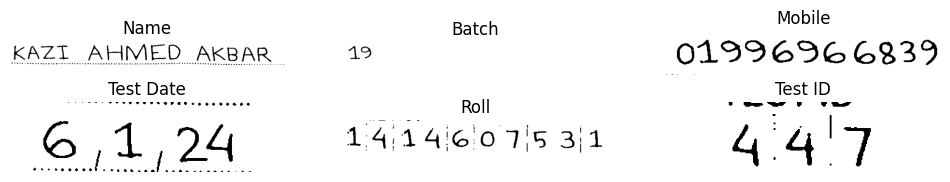

In [208]:
name_noise_removed = noise_removal(name_bw)
batch_noise_removed = noise_removal(batch_bw)
mobile_noise_removed = noise_removal(mobile_bw)
test_date_noise_removed = noise_removal(test_date_bw)
roll_noise_removed = noise_removal(roll_bw)
test_id_noise_removed = noise_removal(test_id_bw)

# Display different roi
plt.figure(figsize=[12,2])
plt.subplot(231);plt.imshow(name_noise_removed, cmap = 'gray');    plt.axis("off");plt.title("Name")
plt.subplot(232);plt.imshow(batch_noise_removed, cmap = 'gray');plt.axis("off");plt.title("Batch")
plt.subplot(233);plt.imshow(mobile_noise_removed, cmap = 'gray');    plt.axis("off");plt.title("Mobile")
plt.subplot(234);plt.imshow(test_date_noise_removed, cmap = 'gray');    plt.axis("off");plt.title("Test Date")
plt.subplot(235);plt.imshow(roll_noise_removed, cmap = 'gray');    plt.axis("off");plt.title("Roll")
plt.subplot(236);plt.imshow(test_id_noise_removed, cmap = 'gray');    plt.axis("off");plt.title("Test ID")

####Step 2.6 : Image Preprocessing for OCR (Increase contrast)

Text(0.5, 1.0, 'Test ID')

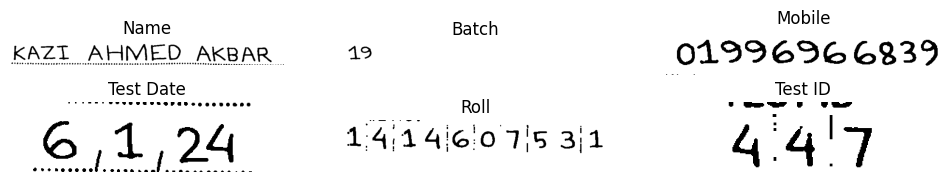

In [209]:
name_dilated = thick_font(name_noise_removed)
batch_dilated = thick_font(batch_noise_removed)
mobile_dilated = thick_font(mobile_noise_removed)
test_date_dilated = thick_font(test_date_noise_removed)
roll_dilated = thick_font(roll_noise_removed)
test_id_dilated = thick_font(test_id_noise_removed)

# Display different roi
plt.figure(figsize=[12,2])
plt.subplot(231);plt.imshow(name_dilated, cmap = 'gray');    plt.axis("off");plt.title("Name")
plt.subplot(232);plt.imshow(batch_dilated, cmap = 'gray');plt.axis("off");plt.title("Batch")
plt.subplot(233);plt.imshow(mobile_dilated, cmap = 'gray');    plt.axis("off");plt.title("Mobile")
plt.subplot(234);plt.imshow(test_date_dilated, cmap = 'gray');    plt.axis("off");plt.title("Test Date")
plt.subplot(235);plt.imshow(roll_dilated, cmap = 'gray');    plt.axis("off");plt.title("Roll")
plt.subplot(236);plt.imshow(test_id_dilated, cmap = 'gray');    plt.axis("off");plt.title("Test ID")

####Step 2.7 : OCR

In [210]:
name = text_recognition(name_dilated)
batch = digit_recognition(batch_dilated)
mobile = digit_recognition(mobile_dilated)
test_day = test_date_dilated[:,:82]
test_month = test_date_dilated[:, 102:168]
test_year = test_date_dilated[:, 186:]
day = digit_recognition(test_day)
month = digit_recognition(test_month)
year = digit_recognition(test_year)
roll = digit_recognition(roll_dilated)
test_id = digit_recognition(test_id_dilated)
print("Name:", name)
print("Batch:", batch)
print("Mobile:", mobile)
print("Test Date:",day,"-",month,"-",year)
print("Roll:",roll)
print("Test ID:",test_id)

Name: KAZT AHMED AKBAR
Batch: 19
Mobile: 01996966339
Test Date: 6 - 4 - 24
Roll: 1414607531
Test ID: 447


##Phase 3 : Automatic Evaluation

####Step 3.1 : Selectiing Different ROIs

Text(0.5, 1.0, 'MCQ Box 2')

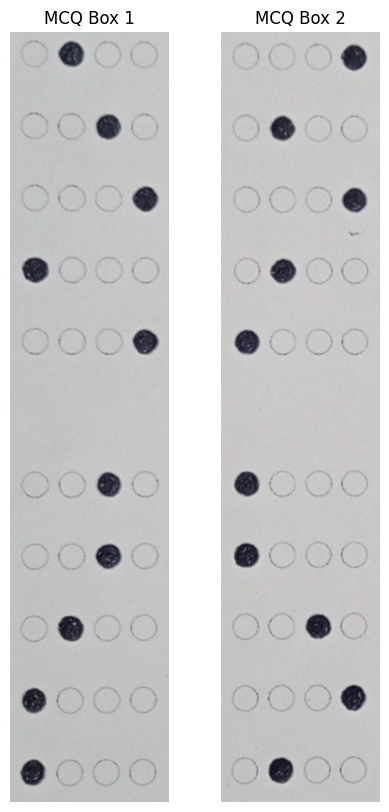

In [242]:
import matplotlib.image as mpimg

def define_and_save_roi(image_path, x, y, width, height, output_path):
    # Read the image
    img = cv2.imread(image_path)

    # Extract the region of interest (ROI) based on the specified coordinates and dimensions
    roi = img[y:y+height, x:x+width]

    # Save the defined area to the specified output directory
    cv2.imwrite(output_path, roi)

# Provide the path to your image file, the coordinates of the upper-left corner pixel,
# width, height, and the output directory
image_path = "/content/registered_form.jpg"

# MCQ box 1 field
mcq_1_path = "/content/mcq_1.jpg"
define_and_save_roi(image_path, 295, 1442, 265, 1290, mcq_1_path)
mcq_1_roi = mpimg.imread(mcq_1_path)

# MCQ box 2 field
mcq_2_path = "/content/mcq_2.jpg"
define_and_save_roi(image_path, 720, 1442, 265, 1290, mcq_2_path)
mcq_2_roi = mpimg.imread(mcq_2_path)

mcq_column_path = [mcq_1_path, mcq_2_path]

plt.figure(figsize=[5,10])
plt.subplot(121);plt.imshow(mcq_1_roi); plt.axis('off'); plt.title("MCQ Box 1")
plt.subplot(122);plt.imshow(mcq_2_roi); plt.axis('off'); plt.title("MCQ Box 2")

####Step 3.2 : Necessary Functions

In [218]:
def group_into_lists(lst, group_size):
    return [lst[i:i + group_size] for i in range(0, len(lst), group_size)]

def is_marked(image, x, y, width, height):
    # Extract the region of interest (ROI)
    roi = image[y:y+height, x:x+width]

    # Calculate total pixels, white pixels, black pixels
    total_pixels = roi.size
    white_pixels = cv2.countNonZero(roi)
    white_percentage = (white_pixels/total_pixels)*100

    # Adjust the threshold based on your image characteristics
    threshold_percentage = 70

    # Check if the percentage of edge pixels exceeds the threshold
    return white_percentage > threshold_percentage


####Step 3.3 : Answer Sheet

In [235]:
answer_column_1 = [1,2,1,2,3,2,1,1,0,0]
answer_column_2 = [3,3,3,1,0,3,0,3,3,2]
answer_sheet = [answer_column_1, answer_column_2]

####Step 3.4 : Circle detection and sorting

Checking MCQ Column 1
Checking MCQ Column 2
Marks: 13/20


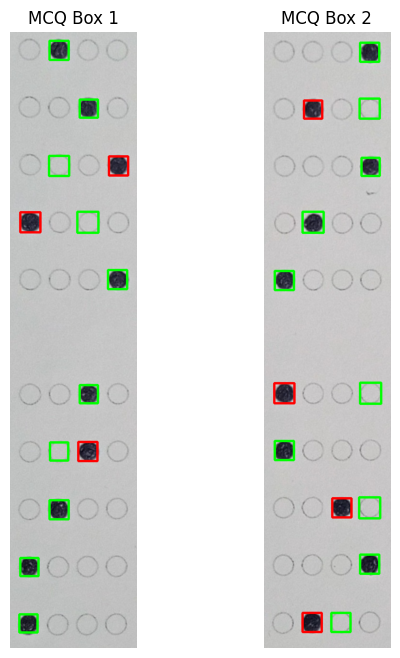

In [243]:
correct = 0  # Initialize the correct counter outside the loop
plt.figure(figsize=(6, 8))

for c, mcq_column in enumerate(mcq_column_path):
  # Read the image
  image = cv2.imread(mcq_column)
  img = image.copy()

  # Read the answers
  answers = answer_sheet[c]

  # Convert the image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # For counting pixel
  _, thresh = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY_INV)

  # Apply GaussianBlur to reduce noise and help contour detection
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)

  # Use HoughCircles to detect circles in the image
  circles = cv2.HoughCircles(
    blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=50, param2=30, minRadius=10, maxRadius=100)

  circles = np.round(circles[0, :]).astype("int")

  # Check if any circle is found
  print(f"Checking MCQ Column {c+1}")

  # Declare a list to store contour boundary data
  rectangles = []

  # Draw rectangular contours around each circle
  for (x, y, r) in circles:
        x1, y1 = x - r, y - r
        x2, y2 = x + r, y + r
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 4)
        rectangles.append((x1, y1, 2*r, 2*r))

  # Sorting rectangular contours as top to bottom
  rectangles = sorted(rectangles, key=lambda rect: rect[1])

  # Defining every 4 circle to be parts of a single mcq
  rows = group_into_lists(rectangles, 4)
  sorted_row = []

  # Sorting 4 circles left to right in a row
  for i, row in enumerate(rows):
    row = sorted(row, key=lambda rect: rect[0])
    sorted_row.append(row)

  correct_figure = []
  for m, n in enumerate(answers):
    p, q, r, s = sorted_row[m][n]
    correct_figure.append((p, q, r, s))

  for (x, y, w, h) in correct_figure:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)

  # Loop to evaluate each mcq (row of 4 options)
  for index, row in enumerate(sorted_row):

    answer = answers[index] # read the answer for each quextion

    flag = 0
    choice = 0

    for i, r in enumerate(row):
      (x, y, w, h) = r
      if is_marked(thresh, x, y, w, h):
        flag = flag + 1
        choice = i

    if flag == 1:
      if choice == answer:
        correct = correct + 1
      else:
        p, q , r, s = sorted_row[index][choice]
        cv2.rectangle(img, (p, q), (p+r, q+s), (0, 0, 255), 4)

  # Display the image with contours using plt.imshow
  plt.subplot(1, 2, c+1)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(f'MCQ Box {c+1}')
  plt.axis('off')

print(f"Marks: {correct}/20")